# Pràctica 1: Resolem un problema de classificacio

## Objectius

Els objectius d'aquesta pràctica són:

* Aplicar els coneixements adquirits sobre classificacio, tecniques d'emplenats de nans i validacio creuada.
  
* Ser capac de comparar diferents models classificacio

* Ser capac de fer busca d'hiperparametres.

* Entendre i implamentar la validacio creuada

* Analitzar detalladament els resultats obtinguts durant l'aprenentatge dels diferents models.

Aquesta practica es previa al cas kaggle que realitzareu durant la segona part de l'assignatura. En aquesta primera practica les preguntes estan definides, pero us ha de servir d'aprenentatge alhora de saber com estructurar un projecte d'aprenentatge automatic ja que en el cas kaggle no tindreu les preguntes.

## Bases de dades

En aquesta practica farem servir la base de dades del titanic. L'atribut que predirem es Survived, el qual ens diu si va sobreviure o no cada passatger.


https://www.kaggle.com/c/titanic/data


##Treball en grup
Aquesta practica es treballara en grups de 2-3 persones. En casos excepcionals i degudament justificats la practica es podra realitzar de forma individual.
## Seguiment i entrega de la pràctica

En la pràctica 1, es presenten diverses tasques per fer una correcta comparativa dels resultats obtinguts per diversos mètodes de classificació numèrica en una mateixa base de dades.


En aquesta practica es realitzara sessions de seguiment del treball. Aquestes sessions de treball està orientada a que els alumnes que vingueu pugueu preguntar i resoldre dubtes sobre les dades, preguntar sobre l'objectiu de cada apartat dels enunciats que no us hagi quedat clar, i preguntar sobre els resultats que esteu obtenint a l'hora d'analitzar les dades. Es molt recomanable venir amb el treball fet a clase per tal de poder comentar dubtes.

Pel que fa l'entrega, caldra entregar per caronte el seguent:

1. Memòria en format PDF o en la mateixa notebook explicant els resultats trobats sobre la bases de dades amb el respectiu codi de python. Aquesta nota es la mateixa per tots els membres del grup (9 pts)

2. Presentació amb els resultats 4 min màxim. Aquesta nota es individual. (1 pt)

Nota: En cas d'entregar la memoria com a PDF, caldra entregar el codi de python a part. Si s'entrega com a notebook, la mateixa notebook servira com a codi.



# Descripcio de la pràctica

A continuacio es mostren tots els continguts que s'evaluara en la pràctica:

1. EDA (exploratory data analysis) (1 punts):
  * Analisi de tamany i tipologia de dades ( 0.25 pt)
  * Primera valoracio de correlacions ( 0.5 pt)
  * Analisi atribut target ( 0.25 pt)
2. Preprocessing (2 punts):
  * Eliminacio de nans (0.5 punts)
  * Encoding de categoriques (0.75 punts)
  * Altres (PCA, normalitzacio..)
3. Metric selection (1.5 punts):
  * Seleccio de la millor metrica pel problema (0.75 punts)
  * Visualitzacio de ROC/AUC (0.75 punts)
4. Model Selection amb Crossvalidation (4 punts):
  * Seleccio del millor model (2 punts)
  * Busqueda hiperparametres (2 punts)
5. Analisi final (1.5 punt)

Cal dir que, les puntuacions dins de cada apartat son orientatives. La pràctica esta construida a partir d'un seguit de preguntes orientatives en cada apartat les quals tenen relacio amb els continguts evaluables. **NO cal contestar-les totes**. Són una guia per a que reflexioneu i aprengueu detalls de cada apartat.  Es recomanable, aixo si, llegir totes les preguntes abans de realitzar la practica i tenir-les en ment alhora d'executar-la.


**IMPORTANT**: El que es valorara en la practica es la capacitat de mantenir una narrativa coherent alhora que es realitzen els resultats. No es mirara tant que alguna pregunta quedi per respondre sino que els passos seguits en base als resultats obtinguts siguin coherents.

### 1. EDA (exploratory data analysis) (1 punt)

**Preguntes:**


In [244]:
import numpy as np
import pandas as pd
train_data = pd.read_csv("titanic/train.csv")

* ¿Cuántos atributos tiene su base de datos?

In [245]:
num_attributes = train_data.shape[1]
attribute_names = train_data.columns.tolist()
print("Número de atributos:", num_attributes)
print("Atributos:", attribute_names)

Número de atributos: 12
Atributos: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


* ¿Qué tipo de atributos tienes? (Numéricos, temporales, categóricos, binarios...)

In [246]:
#Esto dará información sobre si los atributos son numéricos (int o float), categóricos (object), temporales (datetime), binarios (boolean), etc.
attribute_types = train_data.dtypes
print("Tipos de atributos:")
print(attribute_types)

Tipos de atributos:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Basándonos en la información, podemos categorizar los atributos de la siguiente manera:

* Atributos Numéricos:
  * PassengerId: Entero (int64) - Identificador único para cada pasajero.
  * Survived: Entero (int64) - Este es el atributo objetivo que representa si un pasajero sobrevivió o no.
  * Pclass: Entero (int64) - Clase del pasajero (1, 2 o 3).
  * Age: Decimal de punto flotante (float64) - Edad del pasajero.
  * SibSp: Entero (int64) - Número de hermanos o cónyuges a bordo.
  * Parch: Entero (int64) - Número de padres o hijos a bordo.
  * Fare: Decimal de punto flotante (float64) - Tarifa pagada por el pasajero.
* Atributos Categóricos:
  * Name: Objeto (object) - Nombre del pasajero (texto).
  * Sex: Objeto (object) - Género del pasajero (por ejemplo, "male" o "female").
  * Ticket: Objeto (object) - Número de boleto del pasajero (texto).
  * Cabin: Objeto (object) - Número de cabina del pasajero (texto).
  * Embarked: Objeto (object) - Puerto de embarque del pasajero (por ejemplo, "C", "Q" o "S").

* Como es el target, ¿cuántas categorías diferentes existen?

In [247]:
target_categories = train_data["Survived"].nunique()
print("Número de categorías en el target:", target_categories)

Número de categorías en el target: 2


El hecho de que haya 2 categorías en el atributo objetivo ("Survived") significa que es un problema de clasificación binaria.  
  
En este caso, las dos categorías representan:

* Sobrevivió (Survived): Esta categoría generalmente se representa como "1" o "Sí" y denota que el pasajero sobrevivió al hundimiento del Titanic.

* No Sobrevivió (Not Survived): Esta categoría generalmente se representa como "0" o "No" y denota que el pasajero no sobrevivió al hundimiento del Titanic.

Dado que es un problema de clasificación binaria, nuestro objetivo será construir un modelo predictivo que pueda predecir si un pasajero sobrevivió (1) o no sobrevivió (0) en función de las características disponibles en los datos.

* ¿Tenemos nulos en los datos?

In [248]:
null_counts = train_data.isnull().sum()
print("Número de valores nulos por atributo:")
print(null_counts)

Número de valores nulos por atributo:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Algunas observaciones sobre el número de valores nulos (NaN):

* Age (Edad): Hay 177 valores nulos en la columna "Age". Esto significa que falta información sobre la edad de 177 pasajeros en los datos. Podemos considerar estrategias para imputar estos valores faltantes, como reemplazarlos con la mediana o la media de la edad.

* Cabin (Cabina): Hay 687 valores nulos en la columna "Cabin". Esto indica que la información sobre la cabina está ausente para la mayoría de los pasajeros. Podemos decidir si utilizar esta columna en el modelo, o descartarla debido a la gran cantidad de valores faltantes.

* Embarked (Puerto de Embarque): Hay 2 valores nulos en la columna "Embarked". Esto significa que falta información sobre el puerto de embarque para 2 pasajeros. Podemos decidir si imputar estos valores o eliminar las filas correspondientes si no afectan significativamente al análisis.

Antes de realizar análisis o modelado, es importante tratar los valores nulos de manera adecuada para garantizar que no afecten negativamente los resultados. Las estrategias de imputación o eliminación de valores nulos dependerán de la naturaleza de los datos y los objetivos del análisis.

* ¿Puede ver alguna correlación entre X y y?

In [249]:
# Calcular la matriz de correlación
correlation_matrix = train_data.corr()

# Ordenar la correlación con respecto a "Survived"
correlation_with_target = correlation_matrix["Survived"].sort_values(ascending=False)

# Mostrar la correlación con "Survived"
print("Correlación con Survived:")
print(correlation_with_target)

Correlación con Survived:
Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


Algunas observaciones sobre la correlación:

* Survived vs. Fare (Tarifa): La correlación positiva de 0.2573 indica que las personas que pagaron tarifas más altas tenían una mayor probabilidad de sobrevivir. Esto podría sugerir que la clase socioeconómica o el nivel de comodidad del pasajero influyeron en sus posibilidades de sobrevivir.

* Survived vs. Parch (Número de Hijos a Bordo): La correlación positiva de 0.0816 sugiere que las personas que viajaban con más hijos tenían una mayor probabilidad de sobrevivir, aunque la correlación no es muy fuerte.

* Survived vs. Age (Edad): La correlación negativa de -0.0772 indica que las personas más jóvenes tenían una ligera tendencia a tener una mayor probabilidad de sobrevivir. Sin embargo, la correlación no es muy fuerte, por lo que la edad por sí sola no es un predictor fuerte de la supervivencia.

* Survived vs. Pclass (Clase del Pasajero): La correlación negativa más fuerte de -0.3385 sugiere que la clase del pasajero influyó significativamente en sus posibilidades de supervivencia. Esto es coherente con la intuición de que las personas en clases socioeconómicas más altas tenían más probabilidades de sobrevivir.

* Survived vs. SibSp (Número de Hermanos/Cónyuges a Bordo): La correlación negativa de -0.0353 indica que las personas que viajaban con más hermanos o cónyuges tenían una ligeramente menor probabilidad de sobrevivir, aunque la correlación es débil.

* Survived vs. PassengerId: La correlación cercana a cero (-0.0050) entre "Survived" y "PassengerId" sugiere que el identificador de pasajero no tiene una influencia significativa en la probabilidad de supervivencia.

Es importante recordar que la correlación no implica causalidad, por lo que no podemos afirmar que una variable causa directamente la supervivencia. Sin embargo, estas correlaciones proporcionan información valiosa para la exploración inicial de datos y pueden ser útiles al seleccionar características para modelos de aprendizaje automático o al comprender mejor las dinámicas en el conjunto de datos del Titanic.

* ¿Están balanceadas las etiquetas (distribución similar entre categorías)? ¿Crees que puede afectar a la clasificación su distribución?

In [250]:
# Conteo de valores únicos en la columna "Survived" (atributo del target)
survival_counts = train_data["Survived"].value_counts()

# Mostrar el conteo de etiquetas
print("Conteo de etiquetas:")
print(survival_counts)

Conteo de etiquetas:
0    549
1    342
Name: Survived, dtype: int64


En este caso, las etiquetas no están completamente balanceadas, ya que hay una diferencia significativa en el número de muestras entre las dos clases.

La distribución desequilibrada puede afectar significativamente la clasificación en un problema de aprendizaje automático, algunas formas en las que puede influir:

* Sesgo en la Predicción: Los modelos de clasificación tienden a tener un sesgo hacia la clase mayoritaria cuando las etiquetas están desequilibradas. Esto significa que el modelo puede predecir con mayor frecuencia la clase mayoritaria, lo que resulta en una baja tasa de detección de la clase minoritaria (falsos negativos).

* Pérdida de Información: Cuando una clase está subrepresentada en los datos, el modelo puede tener menos información para aprender sobre esa clase, lo que podría resultar en una capacidad de predicción deficiente para esa clase.

* Métricas Engañosas: Las métricas de evaluación, como la precisión, pueden ser engañosas en conjuntos de datos desequilibrados. Un modelo que predice siempre la clase mayoritaria podría tener una alta precisión, pero no sería útil en la práctica.

* Costos Asociados: En aplicaciones del mundo real, las decisiones basadas en modelos de clasificación pueden tener costos asociados. Por ejemplo, en la detección de enfermedades raras, predecir incorrectamente la clase minoritaria puede tener consecuencias graves.

**Información General:**

Análisis del tamaño y la tipología de los datos:

In [251]:
# Tamaño de los datos de entrenamiento
print("Tamaño de los datos de entrenamiento:", train_data.shape)


Tamaño de los datos de entrenamiento: (891, 12)


In [252]:
# Información sobre las columnas y tipos de datos
print("\nInformación de los datos de entrenamiento:")
print(train_data.info())


Información de los datos de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [253]:
# Resumen estadístico de las columnas numéricas
print("\nResumen estadístico de las columnas numéricas:")
d=train_data.describe()
d


Resumen estadístico de las columnas numéricas:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Valoración de correlación:

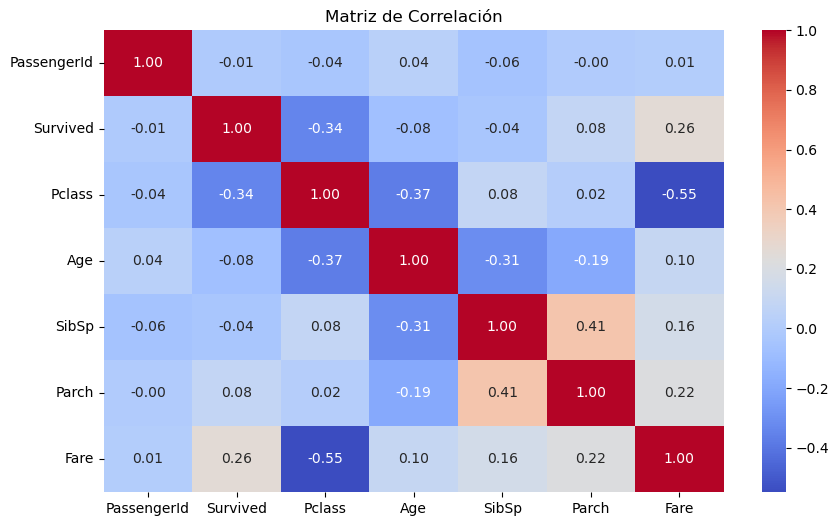

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación
correlation_matrix = train_data.corr()

# Visualización de la matriz de correlación en un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

Análisis de los atributos del target:

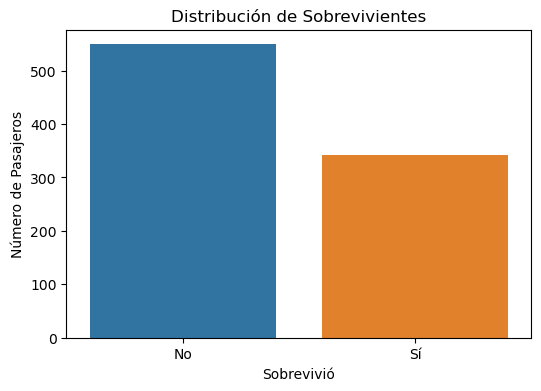

Porcentaje de pasajeros que sobrevivieron:
0    61.616162
1    38.383838
Name: Survived, dtype: float64


In [255]:
# Conteo de valores únicos en la columna "Survived" (atributo del target)
survival_counts = train_data["Survived"].value_counts()

# Gráfico de barras para visualizar la distribución de sobrevivientes
plt.figure(figsize=(6, 4))
sns.countplot(x="Survived", data=train_data)
plt.xlabel("Sobrevivió")
plt.ylabel("Número de Pasajeros")
plt.title("Distribución de Sobrevivientes")
plt.xticks([0, 1], ["No", "Sí"])
plt.show()

# Porcentaje de pasajeros que sobrevivieron
survival_percentage = survival_counts / len(train_data) * 100
print("Porcentaje de pasajeros que sobrevivieron:")
print(survival_percentage)


### 2. Preprocessing (normalitzation, outlier removal, feature selection..) (2 punts)

**Preguntes:**

In [256]:
train_data = pd.read_csv("titanic/train.csv")

In [257]:
train_data.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


* ¿Están las datos normalizados? ¿Sería necesario?

Dado que estamos trabajando con datos no normalizados, que contiene características como "Age" y "Fare", es mejor aplicar la normalización Z-score (StandardScaler) para asegurarse de que todas las características estén en la misma escala, especialmente si planeamos usar algoritmos sensibles a la escala de las características.  

La normalización es útil si se esta utilizando algoritmos sensibles a la escala de las características, como regresión lineal o k-Nearest Neighbors (k-NN).  
Por otra parte, si aplicamos algoritmos de Machine Learning o árboles de decisión que no son sensibles a la escala de las características, la normalización podría no ser necesaria.

* En caso de normalización, ¿qué tipo de normalización es más adecuada?

Para nuestros datos, la normalización Z-score (StandardScaler) sería una buena opción si asumimos que las características siguen una distribución normal. Esto ayudará a mantener la interpretabilidad y comparabilidad de las características.  

Otra opción es la normalización Min-Max (MinMaxScaler), que escala los datos al rango [0, 1], lo que puede ser útil si tienes datos con valores atípicos.

* ¿Tienes muchos valores faltantes (NaN)? ¿Cómo afectan a la clasificación?

Sí, en nuestros datos, observamos valores faltantes en las columnas "Age", "Cabin" y "Embarked".  

La forma en que manejamos estos valores faltantes puede afectar significativamente la calidad de nuestros modelos.  
* Dado que tenemos una cantidad considerable de valores faltantes en "Cabin", consideraría eliminar esta columna.  
* Para "Age" y "Embarked", podríamos imputar los valores faltantes utilizando la mediana para "Age" y eliminando las filas con valores faltantes en "Embarked".  

Esto asegurará que nuestros modelos funcionen sin problemas.

* ¿Tienes datos categóricos? ¿Cómo se deben codificar?

Sí, tenemos datos categóricos en las columnas "Embarked", "Sex", "Cabin", "Ticket" y "Name".

Podemos utilizar la codificación one-hot (dummy encoding) para convertir estas columnas en columnas binarias para cada categoría de los datos.  

Esto asegurará que el modelo pueda trabajar con estos datos categóricos.

* ¿Puedes extraer atributos adicionales de los datos categóricos?

En algunos casos, es posible derivar atributos adicionales de las características categóricas. Por ejemplo, si tienes una columna de "Fecha de Nacimiento", puedes derivar la "Edad" como un atributo numérico. Esto puede ser útil si la información de la fecha de nacimiento es relevante para el análisis.

En nuestro conjunto de datos, no veo una oportunidad obvia para extraer atributos adicionales de los datos categóricos.

* ¿Es necesario aplicar PCA? ¿Qué beneficios o inconvenientes encuentras?

Dado que nuestro conjunto de datos no tiene una alta dimensionalidad inicial, la aplicación de PCA podría no ser necesaria.  

La reducción de dimensionalidad podría llevar a una pérdida de información, por lo que debemos evaluar si el beneficio de la reducción de dimensionalidad supera la pérdida de información.

* ¿Es necesario aplicar alguna técnica de selección de características?

Dado que la cantidad de características en nuestro conjunto de datos no es excesivamente alta, la selección de características puede no ser crítica. 

* ¿Se pueden aplicar PolynomialFeatures para mejorar la clasificación? ¿En qué modelos tiene sentido hacerlo?

PolynomialFeatures se utiliza para generar características polinómicas a partir de las características existentes. Puede ser útil en modelos lineales y algunos algoritmos de regresión para capturar relaciones no lineales entre las características. No suele ser necesario en modelos como árboles de decisión o Random Forest, que pueden manejar relaciones no lineales sin necesidad de esta transformación.

**Información General:**

In [258]:
train_data = pd.read_csv("titanic/train.csv")

Eliminacio de nans

In [259]:
# Calcular la edad media por clase social
age_class_means = train_data.groupby('Pclass')['Age'].mean()

# Función para rellenar los NaN en 'Age' con la media correspondiente a la 'Pclass'
def impute_age(row):
    if pd.isnull(row['Age']):
        return age_class_means[row['Pclass']]
    return row['Age']

train_data['Age'] = train_data.apply(impute_age, axis=1)

# Descartar la columna "Cabin" debido a la gran cantidad de valores faltantes.
# Descartar las columnas "PassengerId", "Name" y "Ticket" debido a su poca relevancia.
train_data.drop(['Cabin','PassengerId','Name','Ticket'], axis=1, inplace=True)

# Descartar las filas con NaN en la columna "Embarked".
train_data.dropna(subset=['Embarked'], inplace=True)

In [260]:
null_counts = train_data.isnull().sum()
print("Número de valores nulos por atributo:")
print(null_counts)

train_data.head(n=10)

Número de valores nulos por atributo:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00000,1,0,7.2500,S
1,1,1,female,38.00000,1,0,71.2833,C
2,1,3,female,26.00000,0,0,7.9250,S
3,1,1,female,35.00000,1,0,53.1000,S
4,0,3,male,35.00000,0,0,8.0500,S
5,0,3,male,25.14062,0,0,8.4583,Q
6,0,1,male,54.00000,0,0,51.8625,S
7,0,3,male,2.00000,3,1,21.0750,S
8,1,3,female,27.00000,0,2,11.1333,S
9,1,2,female,14.00000,1,0,30.0708,C


Encoding de categoriques

In [261]:
# La codificación one-hot convierte cada categoría en una columna binaria (0 o 1), creando una columna separada para cada categoría.
train_data = pd.get_dummies(train_data, columns=["Sex", "Embarked"])
train_data.head(n=10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.00000,1,0,7.2500,0,1,0,0,1
1,1,1,38.00000,1,0,71.2833,1,0,1,0,0
2,1,3,26.00000,0,0,7.9250,1,0,0,0,1
3,1,1,35.00000,1,0,53.1000,1,0,0,0,1
4,0,3,35.00000,0,0,8.0500,0,1,0,0,1
5,0,3,25.14062,0,0,8.4583,0,1,0,1,0
6,0,1,54.00000,0,0,51.8625,0,1,0,0,1
7,0,3,2.00000,3,1,21.0750,0,1,0,0,1
8,1,3,27.00000,0,2,11.1333,1,0,0,0,1
9,1,2,14.00000,1,0,30.0708,1,0,1,0,0


Altres (PCA, normalitzacio..)

In [262]:
# Normalización
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto de escala
scaler = MinMaxScaler()

# Ajustar y transformar las características numéricas
train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])

train_data.head(n=10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0.271174,1,0,0.014151,0,1,0,0,1
1,1,1,0.472229,1,0,0.139136,1,0,1,0,0
2,1,3,0.321438,0,0,0.015469,1,0,0,0,1
3,1,1,0.434531,1,0,0.103644,1,0,0,0,1
4,0,3,0.434531,0,0,0.015713,0,1,0,0,1
5,0,3,0.310639,0,0,0.016510,0,1,0,1,0
6,0,1,0.673285,0,0,0.101229,0,1,0,0,1
7,0,3,0.019854,3,1,0.041136,0,1,0,0,1
8,1,3,0.334004,0,2,0.021731,1,0,0,0,1
9,1,2,0.170646,1,0,0.058694,1,0,1,0,0


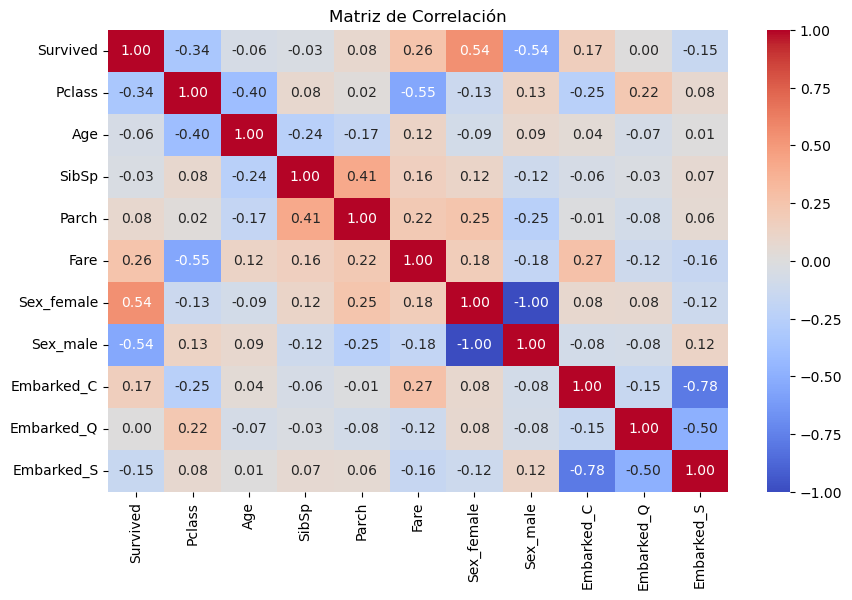

In [263]:
# Matriz de correlación
correlation_matrix = train_data.corr()

# Visualización de la matriz de correlación en un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [264]:
# Ordenar la correlación con respecto a "Survived"
correlation_with_target = correlation_matrix["Survived"].sort_values(ascending=False)

# Mostrar la correlación con "Survived"
print("Correlación con Survived:")
print(correlation_with_target)

Correlación con Survived:
Survived      1.000000
Sex_female    0.541585
Fare          0.255290
Embarked_C    0.169966
Parch         0.083151
Embarked_Q    0.004536
SibSp        -0.034040
Age          -0.055278
Embarked_S   -0.151777
Pclass       -0.335549
Sex_male     -0.541585
Name: Survived, dtype: float64


La matriz de correlación que has proporcionado muestra la correlación de las diferentes características con la variable "Survived" en el conjunto de datos del Titanic. Aquí hay algunas observaciones basadas en estas correlaciones:

1. Sexo (Sex): La variable "Sex_female" tiene una correlación positiva de 0.541585 con "Survived", lo que indica que las mujeres tenían una mayor probabilidad de sobrevivir en comparación con los hombres, que tienen una correlación negativa de -0.541585. Esto sugiere que el género estaba fuertemente relacionado con la supervivencia en el Titanic.

2. Tarifa (Fare): La tarifa ("Fare") también tiene una correlación positiva moderada de 0.255290 con "Survived". Esto podría indicar que las personas que pagaron tarifas más altas tenían una mayor probabilidad de sobrevivir.

3. Puerto de Embarque (Embarked): "Embarked_C" tiene una correlación positiva de 0.169966 con "Survived", lo que sugiere que los pasajeros que embarcaron en Cherbourg tenían una mayor probabilidad de sobrevivir. Por otro lado, "Embarked_S" tiene una correlación negativa de -0.151777, lo que sugiere que los pasajeros que embarcaron en Southampton tenían una menor probabilidad de sobrevivir.

4. Clase de Pasajero (Pclass): La variable "Pclass" (clase de pasajero) tiene una correlación negativa de -0.335549 con "Survived". Esto indica que los pasajeros de clases más bajas (números más altos) tenían una menor probabilidad de sobrevivir.

5. Edad (Age): La variable "Age" tiene una correlación negativa de -0.055278 con "Survived". Sin embargo, esta correlación es bastante baja en comparación con otras características, lo que sugiere que la edad no tenía una influencia muy fuerte en la supervivencia en el Titanic.

6. Número de Hijos (Parch) y Número de Hermanos (SibSp): Estas variables tienen correlaciones bastante bajas con "Survived" (0.083151 y -0.034040, respectivamente). Esto indica que el número de hijos o hermanos a bordo no tenía una influencia significativa en la supervivencia.

Es importante tener en cuenta que la correlación no implica causalidad, y otras variables no incluidas en esta matriz de correlación pueden estar influyendo en la supervivencia de los pasajeros. Estas correlaciones proporcionan una idea inicial de cómo ciertas características pueden haber estado relacionadas con la supervivencia en el Titanic.

In [265]:
# Análisis de Componentes Principales (PCA)
from sklearn.decomposition import PCA

# Crear un objeto de PCA
pca = PCA(n_components=2)  # Define el número de componentes principales deseados

# Aplicar PCA a las características normalizadas
principal_components = pca.fit_transform(train_data[['Age', 'Fare']])

# Agregar los componentes principales de vuelta al DataFrame si es necesario
train_data['PCA1'] = principal_components[:, 0]
train_data['PCA2'] = principal_components[:, 1]

train_data.head(n=10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,PCA1,PCA2
0,0,3,0.271174,1,0,0.014151,0,1,0,0,1,-0.095591,-0.038803
1,1,1,0.472229,1,0,0.139136,1,0,1,0,0,0.117331,0.064680
2,1,3,0.321438,0,0,0.015469,1,0,0,0,1,-0.045461,-0.042700
3,1,1,0.434531,1,0,0.103644,1,0,0,0,1,0.076159,0.033285
4,0,3,0.434531,0,0,0.015713,0,1,0,0,1,0.067049,-0.054174
5,0,3,0.310639,0,0,0.016510,0,1,0,1,0,-0.056094,-0.040546
6,0,1,0.673285,0,0,0.101229,0,1,0,0,1,0.313378,0.006147
7,0,3,0.019854,3,1,0.041136,0,1,0,0,1,-0.342763,0.014073
8,1,3,0.334004,0,2,0.021731,1,0,0,0,1,-0.032314,-0.037773
9,1,2,0.170646,1,0,0.058694,1,0,1,0,0,-0.190963,0.015915


In [266]:
# Como nuestro conjunto de datos no tiene una alta dimensionalidad inicial, la aplicación de PCA podría no ser necesaria.
train_data.drop(['PCA1', 'PCA2'], axis=1, inplace=True)

### 3. Metric selection (1.5 punts)

**Preguntes:**

* ¿Podría explicar y justificar cuál de las siguientes métricas será la más adecuada para su problema? `accuracy_score`, `f1_score` o `average_precision_score`?

1. Accuracy (exactitud): La exactitud mide el porcentaje de predicciones correctas en general, pero en un conjunto de datos desequilibrado como el Titanic, puede ser engañosa si hay una gran diferencia entre las clases de sobrevivientes y no sobrevivientes.

2. F1-Score: El F1-Score combina precisión y sensibilidad, lo que lo hace relevante cuando queremos un equilibrio entre ambas métricas.

3. Average Precision Score (Puntuación de precisión promedio): Si nos interesa evaluar la precisión de nuestras predicciones en diferentes umbrales de decisión, la puntuación de precisión promedio puede ser útil.

La elección depende de nuestros objetivos, pero si buscamos un equilibrio entre precisión y sensibilidad, el F1-Score podría ser el más adecuado.

* Muestre la `precision_recall_curve` y la `roc_curve`. ¿Cuál es más relevante para su dataset? Explique con sus palabras, la diferencia entre una y otra.

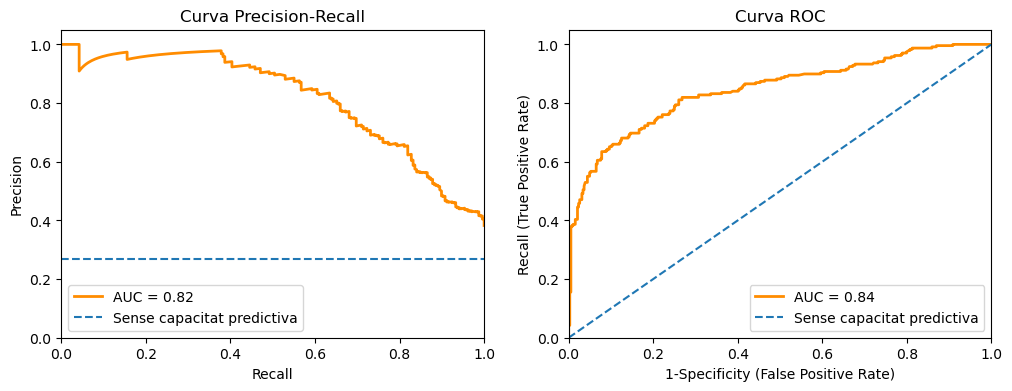

In [267]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Dividir los datos en características (X) y etiquetas (y)
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Generar una predicción sin habilidad (clase mayoritaria)
ns_probs = [0 for _ in range(len(y_train))]

# Calcular la probabilidad de predicción
y_pred_prob = model.predict_proba(X_train)[:, 1]

# Calcula la curva Precision-Recall (PRC)
precision, recall, thresholds = precision_recall_curve(y_train, y_pred_prob)

# Calcula el área bajo la curva Precision-Recall (AUC-PRC)
auc_prc = auc(recall, precision)

# Calcula la curva ROC y el área bajo la curva ROC (AUC-ROC)
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)
auc_roc = auc(fpr, tpr)

# Visualiza la curva PRC
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(recall, precision, color='darkorange', lw=2, label=f'AUC = {auc_prc:.2f}')
no_skill = len(y_train[y_train==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sense capacitat predictiva')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')

# Visualiza la curva ROC
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_roc:.2f}')
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sense capacitat predictiva')
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Recall (True Positive Rate)')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva ROC')
plt.legend(loc='lower right')

plt.show()

1. Precision-Recall Curve: La PRC muestra cómo cambia el rendimiento del modelo a medida que variamos el umbral de decisión, centrándose en las predicciones positivas.  
Es fundamental en problemas de desequilibrio de clases para comprender cómo el modelo predice correctamente las muestras positivas.

2. ROC Curve: La ROC muestra la relación entre la tasa de verdaderos positivos (Recall) y la tasa de falsos positivos (1-Specificity) a medida que variamos el umbral de decisión.  
Es útil para evaluar la capacidad de discriminación del modelo y su capacidad para distinguir entre clases positivas y negativa


En nuestro caso, la PRC es más relevante, ya que tenemos un desequilibrio significativo entre los sobrevivientes y los no sobrevivientes. Nos ayuda a entender cómo varía el rendimiento del modelo según diferentes umbrales de decisión y cómo impacta en la identificación de sobrevivientes.

La principal diferencia entre estas dos curvas es que la PRC se centra en las predicciones positivas, mientras que la ROC se centra en la tasa de falsos positivos. 

* ¿Qué muestra `classification_report`? ¿Qué métrica se fijará para optimizar su clasificación para su caso?

El `classification_report` proporciona un informe detallado de las métricas de clasificación, incluyendo precisión, sensibilidad, F1-Score y soporte (número de ejemplos) para cada clase.  
Es una herramienta valiosa para evaluar el rendimiento del modelo en cada clase.

La métrica en la que nos enfocamos para optimizar la clasificación dependerá de nuestros objetivos. Si buscamos un equilibrio entre precisión y sensibilidad, optimizar el F1-Score podría ser la elección. Sin embargo, debemos considerar las implicaciones prácticas de nuestras predicciones y ajustar nuestras métricas según el contexto específico del problema.

In [268]:
from sklearn.metrics import classification_report

# Realizar predicciones en los mismos datos (esto es solo para propósitos demostrativos)
y_pred = model.predict(X_train)

# Genera el classification_report
report = classification_report(y_train, y_pred)

# Imprime el informe
print(report)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       384
           1       0.76      0.68      0.72       238

    accuracy                           0.80       622
   macro avg       0.79      0.78      0.78       622
weighted avg       0.80      0.80      0.79       622



**Información General:**

Selección de la mejor métrica para el problema

En nuestro proyecto de clasificación de supervivencia en el Titanic, la elección de la métrica es crucial para evaluar el rendimiento de nuestros modelos. Dado que tenemos un problema de clasificación binaria (sobrevivió o no), aquí hay algunas métricas que debemos considerar:

* Exactitud (Accuracy): Esta métrica mide la proporción de predicciones correctas en general.  
Es útil como métrica general de rendimiento, pero puede no ser la mejor elección si nuestras clases están desequilibradas.

* Precisión (Precision): La precisión se centra en la proporción de predicciones positivas correctas entre todas las predicciones positivas.  
Es útil si queremos minimizar los falsos positivos.

* Sensibilidad (Recall): La sensibilidad se enfoca en la proporción de verdaderos positivos entre todos los ejemplos positivos en nuestros datos.  
Es útil si deseamos minimizar los falsos negativos.

* Especificidad (Specificity): Se refiere a la proporción de verdaderos negativos entre todos los ejemplos negativos.  
Es útil para minimizar los falsos positivos.

* F1-Score: Esta métrica combina precisión y sensibilidad.  
Es útil cuando necesitamos encontrar un equilibrio entre ambas.

La elección de la métrica dependerá de nuestros objetivos y del equilibrio entre falsos positivos y falsos negativos que deseamos alcanzar.

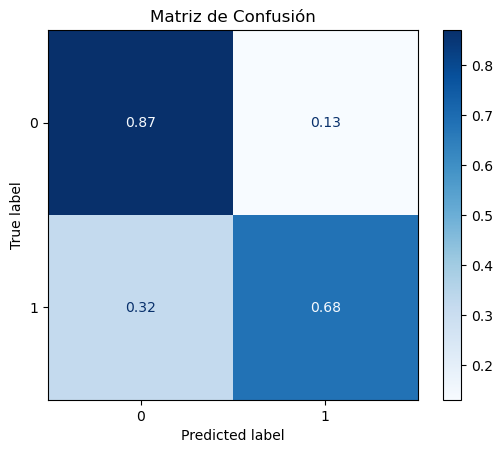

        Metric     Score
0     Accuracy  0.797428
1    Precision  0.764151
2       Recall  0.680672
3  Specificity  0.814634
4     F1-Score  0.720000


In [269]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Realizar predicciones en los mismos datos (esto es solo para propósitos demostrativos)
y_pred = model.predict(X_train)

# Generar una matriz de confusión
conf_matrix = confusion_matrix(y_train, y_pred)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)

# Visualizar la matriz de confusión normalizada
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title('Matriz de Confusión')
plt.show()

# Calcular las métricas
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
specificity = precision_score(y_train, y_pred, pos_label=0)
f1 = f1_score(y_train, y_pred)

# Crear un DataFrame para almacenar las métricas
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score'],
    'Score': [accuracy, precision, recall, specificity, f1]
})

# Mostrar la tabla de métricas
print(metrics_df)

Visualización de la curva ROC/AUC:

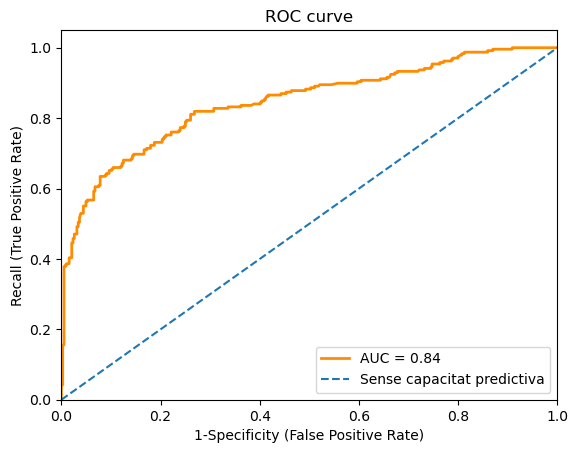

In [270]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Generar una predicción sin habilidad (clase mayoritaria)
ns_probs = [0 for _ in range(len(y_train))]

# Calcular la probabilidad de predicción para la curva ROC
y_pred_prob = model.predict_proba(X_train)[:, 1]

# Calcula la curva ROC y el área bajo la curva ROC (AUC-ROC)
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)
auc_roc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_roc:.2f}')
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sense capacitat predictiva')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Recall (True Positive Rate)')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

### 4. Model Selection amb validacio creuada (4 punts)

Fent servir la metrica F1-Score, en aquest apartat caldra seleccionar una serie de models i, fent us de la validacio creuada, seleccionar el millor model amb els seus respectius millors hyperparametres que haurem buscat fent hyperparameter search.

La tasca d'aquesta pràctica s'enmarca dins l'aprenentatge computacional **supervisat**. A sklearn, disposem de varies tècniques [(veure documentació)](https://scikit-learn.org/stable/supervised_learning.html). A les classes de teoria, hem vist varies tècniques, com ara logistic regression, SVM amb diferents kernels, Nearest Neighbour... i tambe coneixeu altres tecniques d'altres cursos, com els arbres de decisio. Ademes, en la classe de problemes hem donat tambe els random forest i els gradient boosting. Per aquest apartat es demana seleccionar **un minim de 4 models** (per exemple, regressio logistica, random forest, KNN, SVM).

**Preguntes:**
* Quins models heu considerat? Perque els heu seleccionat?
* Fent servir validacio creuada, escolliu el millor model (agafant els hiperparamtres per defecte). Recordeu fer servir la metrica utilitzada en l'apartat anterior. Perque es important fer servir validacio creuada? Heu de fer servir algun [tipus de validacio creuada](https://scikit-learn.org/stable/modules/cross_validation.html) en especial?

* Seleccioneu una serie d'hyperparametres a provar per cadascun dels models i realitzeu una cerca d'hyperparametres. Hi ha algun model que creieu que podeu descartar de primeres? Perque?

* Mostreu els resultats en una taula on es mostri el model, els experiments realitzats i els resultats obtinguts (tant en train com en test). Podeu mostrar tambe el temps d'entrenament de cada model.

* Quin tipus de K-fold heu escollit en la seleccio de models? I en la seleccio de models amb hyperparametres? Com afecta al resultat modificar el numero de k (numero de folds) al resultat?

* Quines formes de buscar el millor parametre heu trobat? Són costoses computacionalment parlant? [documentació](https://scikit-learn.org/stable/modules/grid_search.html) Quina heu seleccionat?

* Si disposem de recursos limitats (per exemple, un PC durant 1 hora) quin dels métodes creieu que obtindrà millor resultat final?

* Existeixen altres mètodes de búsqueda més eficients ([scikit-optimize](https://scikit-optimize.github.io/stable/))?

* Opcional : Feu la prova, i amb el model i el metode de crossvalidació escollit, configureu els diferents metodes de búsqueda per a que s'executin durant el mateix temps (i.e. depenent del problema, 0,5h-1 hora). Analitzeu quin ha arribat a una millor solució. (Ajuda: estimeu el temps que trigarà a fer 1 training el vostre model, i aixi trobeu el número de intents que podeu fer en cada cas.)


**Preguntes:**

* Quins models heu considerat? Perque els heu seleccionat?

Hemos seleccionado: logistic regression, KNN, gradient boosting y random forest. Hemos decidido escoger 2 simples y 2 ensembles para tener dos representantes más simples y dos más complejos. Nos hemos limitado a los modelos vistos en clase para al menos tener una idea de qué hiperparámetros tendremos que buscar más adelante y cómo. 

* Fent servir validacio creuada, escolliu el millor model (agafant els hiperparamtres per defecte). Recordeu fer servir la metrica utilitzada en l'apartat anterior. Perque es important fer servir validacio creuada? Heu de fer servir algun [tipus de validacio creuada](https://scikit-learn.org/stable/modules/cross_validation.html) en especial?

In [271]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

strat = StratifiedKFold(n_splits=10)

In [272]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

lrmodel = LogisticRegression()
knmodel = KNeighborsClassifier()
rfmodel = RandomForestClassifier()
gbmodel = GradientBoostingClassifier()

print("LogisticRegression mean f1-score: "+ str(sum(cross_val_score(lrmodel, X_train, y_train, cv=strat, scoring='f1'))/10))
print("KNeighborsClassifier mean f1-score: "+ str(sum(cross_val_score(knmodel, X_train, y_train, cv=strat, scoring='f1'))/10))
print("RandomForestClassifier mean f1-score: "+ str(sum(cross_val_score(rfmodel, X_train, y_train, cv=strat, scoring='f1'))/10))
print("GradientBoostingClassifier mean f1-score: "+ str(sum(cross_val_score(gbmodel, X_train, y_train, cv=strat, scoring='f1'))/10))

LogisticRegression mean f1-score: 0.7064322075113667
KNeighborsClassifier mean f1-score: 0.713127826694488


RandomForestClassifier mean f1-score: 0.7438011761441187
GradientBoostingClassifier mean f1-score: 0.7554132505415463


El modelo que mejor ha funcionado con los parámetros por defecto según la métrica escogida es el Gradient Boosting.  
Es importante utilizar la validación cruzada porque nos permite hacer múltiples evaluaciones del modelo y así ver qué tal se comporta sin utilizar el conjunto determinado para el test.  
En este caso hemos utilizado una validación cruzada KFold stratified para asegurar una correcta representación de los datos tanto en el train como en la validación, esto es debido sobre todo a que el conjunto de datos está desbalanceado.

* Seleccioneu una serie d'hyperparametres a provar per cadascun dels models i realitzeu una cerca d'hyperparametres. Hi ha algun model que creieu que podeu descartar de primeres? Perque?

Para la Logistic Regression seleccionaremos los hiperparámetros:  
* penalty=['l2', 'l1', None]  
* solver=['lbfgs', 'liblinear']
* tol=[0.25, 0.5, 0.75] e iremos profundizando para afinar más  
  
Para el KNN seleccionaremos los hiperparámetros:  
* n_neighbors=[3, 5, 7, 9]  
* metric=['minkowski', 'euclidean', 'cosine', 'manhattan', 'l1', 'l2', 'haversine']  
  
Para el Random Forest seleccionaremos los hiperparámetros:  
* n_estimators=[100, 200, 500, 1000] y si hace falta iremos profundizando para afinar más  
* criterion=['gini', 'entropy', 'log_loss']  
* max_depth=[1, 3, 5] y si hace falta iremos profundizando para afinar más   
* max_features=['sqrt', 'log2']  
  
Para el Gradient Boosting seleccionaremos los hiperparámetros:  
* loss=['log_loss', 'exponential']  
* learning_rate=[0.001, 0.01, 0.1]  
* n_estimators=[100, 200, 500, 1000]  
* criterion=['friedman_mse', 'squared_error']  

In [273]:
from sklearn.model_selection import GridSearchCV
import time
from tabulate import tabulate

def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn

lrmodel = LogisticRegression()
knmodel = KNeighborsClassifier()
rfmodel = RandomForestClassifier()
gbmodel = GradientBoostingClassifier()

lr_params = dict(penalty=['l2', 'l1', None], solver=['lbfgs', 'liblinear'], tol=[0.25, 0.5, 0.75])
kn_params = dict(n_neighbors=[3, 5, 7, 9], metric=['minkowski', 'euclidean', 'cosine', 'manhattan', 'l1', 'l2', 'haversine'])
rf_params = dict(n_estimators=[100, 200, 500, 1000], criterion=['gini', 'entropy', 'log_loss'], max_depth=[1, 3, 5], max_features=['sqrt', 'log2'])
gb_params = dict(loss=['log_loss', 'exponential'], learning_rate=[0.001, 0.01, 0.1],  n_estimators=[100, 200, 500, 1000], criterion=['friedman_mse', 'squared_error'])

models = [lrmodel, knmodel, rfmodel, gbmodel]
params = [lr_params, kn_params, rf_params, gb_params]

taulaTrain = {'Model':[], 'Experiments':[], 'BestScore':[], 'TrainTime':[]}

for i in range(0, 4):
    taulaTrain['Model'].append(models[i])
    startTime = time.perf_counter()
    gridsearch = GridSearchCV(models[i], params[i], cv=strat, scoring='f1', verbose=0)
    search = gridsearch.fit(X_train, y_train)
    taulaTrain['TrainTime'].append(time.perf_counter()-startTime)
    taulaTrain['Experiments'].append('RandomizedSearchCV')
    taulaTrain['BestScore'].append(search.best_score_)
    print(str(models[i]) + " best params: " + str(search.best_params_))

print(tabulate(taulaTrain, headers=['Model', 'Experiments', 'BestScore', 'TrainTime'], tablefmt='grid'))

LogisticRegression() best params: {'penalty': None, 'solver': 'lbfgs', 'tol': 0.75}
KNeighborsClassifier() best params: {'metric': 'manhattan', 'n_neighbors': 9}
RandomForestClassifier() best params: {'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}
GradientBoostingClassifier() best params: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'log_loss', 'n_estimators': 200}
+------------------------------+--------------------+-------------+-------------+
| Model                        | Experiments        |   BestScore |   TrainTime |
+==============================+====================+=============+=============+
| LogisticRegression()         | RandomizedSearchCV |    0.712844 |    0.784766 |
+------------------------------+--------------------+-------------+-------------+
| KNeighborsClassifier()       | RandomizedSearchCV |    0.716581 |    1.61041  |
+------------------------------+--------------------+-------------+-------------+
| Ra

* Mostreu els resultats en una taula on es mostri el model, els experiments realitzats i els resultats obtinguts (tant en train com en test). Podeu mostrar tambe el temps d'entrenament de cada model.

In [275]:
from sklearn.metrics import f1_score

lrmodel = LogisticRegression(penalty=None, solver='lbfgs', tol=0.75)
knmodel = KNeighborsClassifier(metric='manhattan', n_neighbors=9)
rfmodel = RandomForestClassifier(criterion='log_loss', max_depth=5, max_features='sqrt', n_estimators=100)
gbmodel = GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.1, loss='log_loss', n_estimators=200)

taulaTest = {'Model':[], 'TestScore':[]}

for i in range(0, 4):
    taulaTest['Model'].append(models[i])
    model = models[i].fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    taulaTest['TestScore'].append(f1_score(y_test, y_test_pred))

print(tabulate(taulaTest, headers=['Model', 'TestScore'], tablefmt='grid'))
    

+------------------------------+-------------+
| Model                        |   TestScore |
+==============================+=============+
| LogisticRegression()         |    0.756219 |
+------------------------------+-------------+
| KNeighborsClassifier()       |    0.727273 |
+------------------------------+-------------+
| RandomForestClassifier()     |    0.748768 |
+------------------------------+-------------+
| GradientBoostingClassifier() |    0.773869 |
+------------------------------+-------------+


* Quin tipus de K-fold heu escollit en la seleccio de models? I en la seleccio de models amb hyperparametres? Com afecta al resultat modificar el numero de k (numero de folds) al resultat?

Hemos escogido un Stratified K-Fold para mantener una buena representación de los datos en todo momento, tanto en la selección dde modelos como en la de hiperparámetros. 

* Quines formes de buscar el millor parametre heu trobat? Són costoses computacionalment parlant? [documentació](https://scikit-learn.org/stable/modules/grid_search.html) Quina heu seleccionat?

Hemos encontrado el RandomizedSearchCV y el GridSearchCV. Son igual de costosas computacionalmente ya que te prueban tantas opciones como valores de hiperparámetros has decidido, pero se diferencian en que GridSearch hace una búsqueda probando cual es la mejor combinación de hiperparámetros mientras que RandomizedSearch hace una búsqueda aleatoria con cada hiperparámetro de forma individual, lo que permite una mejor representación del espacio de combinaciones a la hora de escoger el hiperparámetro. Hemos escogido RandomizedSearchCV con un stratified k-fold de 5.

* Si disposem de recursos limitats (per exemple, un PC durant 1 hora) quin dels métodes creieu que obtindrà millor resultat final?

Con lo dicho en el apartado anterior, consideramos que el mejor resultado se obtendrá del RandomizedSearch por la forma en la que realiza la búsqueda de hiperparámetros y la mejor representación menos limitada que proporciona de las posibles opciones.

* Existeixen altres mètodes de búsqueda més eficients ([scikit-optimize](https://scikit-optimize.github.io/stable/))?

Existe un método de búsqueda llamado BayesianSearchCV, que consiste en un GridSearchCV pero con optimizaciones Bayesianas en las que un modelo predictivo se utiliza para modelar el espacio de búsqueda y así llegar a la mejor combinación de hiperparámetros lo antes posible.

* Opcional : Feu la prova, i amb el model i el metode de crossvalidació escollit, configureu els diferents metodes de búsqueda per a que s'executin durant el mateix temps (i.e. depenent del problema, 0,5h-1 hora). Analitzeu quin ha arribat a una millor solució. (Ajuda: estimeu el temps que trigarà a fer 1 training el vostre model, i aixi trobeu el número de intents que podeu fer en cada cas.)

**Información General:**

  * Seleccio del millor model (2 punts)
  * Busqueda hiperparametres (2 punts)

### 5.Analisi Final (1.5 punt)

Un cop seleccionat el millor model amb els millors hiperparamtres, caldra fer un report final amb els resultats obtinguts.

Preguntes:
* Mostreu les curves ROC/PR (la que hageu escollit en l'apartat 2) i interpreteu els resultats.

* Analitzeu en detall les diferents metriques que trobeu adients i comenteu per sobre com podrieu fer servir aquest model en un futur. Aixo es el que es coneix com un cas d'us.

* Com creieu que es podria millorar el vostre model?